<a href="https://colab.research.google.com/github/tonyjosephsebastians/100DaysMLCode/blob/main/NLP_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

     |████████████████████████████████| 2.6 MB 9.0 MB/s 
     |████████████████████████████████| 895 kB 61.2 MB/s 
     |████████████████████████████████| 3.3 MB 58.7 MB/s 
     |████████████████████████████████| 636 kB 52.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
# BERT
# Spacy
# NLTK
# textblob

In [3]:
from transformers import pipeline

nlp = pipeline("sentiment-analysis")

In [4]:
print(nlp("I hATE you"))

[{'label': 'NEGATIVE', 'score': 0.9991129040718079}]


In [5]:
print(nlp("a cup of water"))

[{'label': 'POSITIVE', 'score': 0.9963132739067078}]


In [6]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [8]:
example_string = """
... Muad'Dib learned rapidly because his first training was in how to learn.
... And the first lesson of all was the basic trust that he could learn.
... It's shocking to find how many people do not believe they can learn,
... and how many more believe learning to be difficult."""

In [9]:
sent_tokenize(example_string)

["\nMuad'Dib learned rapidly because his first training was in how to learn.",
 'And the first lesson of all was the basic trust that he could learn.',
 "It's shocking to find how many people do not believe they can learn,\nand how many more believe learning to be difficult."]

In [10]:
word_tokenize(example_string)

["Muad'Dib",
 'learned',
 'rapidly',
 'because',
 'his',
 'first',
 'training',
 'was',
 'in',
 'how',
 'to',
 'learn',
 '.',
 'And',
 'the',
 'first',
 'lesson',
 'of',
 'all',
 'was',
 'the',
 'basic',
 'trust',
 'that',
 'he',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'to',
 'find',
 'how',
 'many',
 'people',
 'do',
 'not',
 'believe',
 'they',
 'can',
 'learn',
 ',',
 'and',
 'how',
 'many',
 'more',
 'believe',
 'learning',
 'to',
 'be',
 'difficult',
 '.']

In [11]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [12]:
from nltk.corpus import stopwords

In [13]:
from nltk.tokenize import word_tokenize

In [14]:
word_list = word_tokenize(example_string)

In [15]:
stop_words = set(stopwords.words("english"))
filt_list =[]
for word in word_list:
  if word not in stop_words:
    filt_list.append(word)
filt_list

["Muad'Dib",
 'learned',
 'rapidly',
 'first',
 'training',
 'learn',
 '.',
 'And',
 'first',
 'lesson',
 'basic',
 'trust',
 'could',
 'learn',
 '.',
 'It',
 "'s",
 'shocking',
 'find',
 'many',
 'people',
 'believe',
 'learn',
 ',',
 'many',
 'believe',
 'learning',
 'difficult',
 '.']

In [16]:
from textblob import TextBlob

In [17]:
text = '''
we are going to have a good week ahead!
'''
blob = TextBlob(text)
print(blob.sentiment.polarity)

0.875


In [18]:
text = '''
I hate you
'''
blob = TextBlob(text)
print(blob.sentiment.polarity)

-0.8


In [19]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [20]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased-finetuned-mrpc")
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased-finetuned-mrpc")

In [21]:
classes = ["not paraphrase", "is paraphrase"]

sequence_0 = "The company HuggingFace is based in New York City"
sequence_1 = "Apples are especially bad for your health"
sequence_2 = "HuggingFace's headquarters are situated in Manhattan"

paraphrase = tokenizer.encode_plus(sequence_0, sequence_2, return_tensors="pt")
not_paraphrase = tokenizer.encode_plus(sequence_0, sequence_1, return_tensors="pt")

paraphrase_classification_logits = model(**paraphrase)[0]
not_paraphrase_classification_logits = model(**not_paraphrase)[0]

paraphrase_results = torch.softmax(paraphrase_classification_logits, dim=1).tolist()[0]
not_paraphrase_results = torch.softmax(not_paraphrase_classification_logits, dim=1).tolist()[0]

print("Should be paraphrase")
for i in range(len(classes)):
    print(f"{classes[i]}: {round(paraphrase_results[i] * 100)}%")

print("\nShould not be paraphrase")
for i in range(len(classes)):
    print(f"{classes[i]}: {round(not_paraphrase_results[i] * 100)}%")

Should be paraphrase
not paraphrase: 10%
is paraphrase: 90%

Should not be paraphrase
not paraphrase: 94%
is paraphrase: 6%


In [22]:
#question answering

In [23]:
from transformers import pipeline

nlp = pipeline("question-answering")

context = r"""
Extractive Question Answering is the task of extracting an answer from a text given a question. An example of a
question answering dataset is the SQuAD dataset, which is entirely based on that task. If you would like to fine-tune
a model on a SQuAD task, you may leverage the `run_squad.py`.
"""

print(nlp(question="What is extractive question answering?", context=context))
print(nlp(question="What is a good example of a question answering dataset?", context=context))


{'score': 0.6222440004348755, 'start': 34, 'end': 95, 'answer': 'the task of extracting an answer from a text given a question'}
{'score': 0.511531412601471, 'start': 147, 'end': 160, 'answer': 'SQuAD dataset'}


In [24]:
context = r"""
We played volleyball in Toronto. 
"""

print(nlp(question="What is the capital of Canada?", context=context))

{'score': 0.9964694976806641, 'start': 25, 'end': 32, 'answer': 'Toronto'}


In [25]:
# this installs the bert system for us
!pip install transformers
# this installs the datasets package
!pip install datasets

     |████████████████████████████████| 264 kB 8.0 MB/s 
     |████████████████████████████████| 243 kB 63.1 MB/s 
     |████████████████████████████████| 76 kB 5.4 MB/s 
     |████████████████████████████████| 118 kB 73.4 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1


In [26]:
#Load the imdb dat for analysing the commnets 
from datasets import load_dataset
train_ds = load_dataset("imdb", split="train")
test_ds = load_dataset("imdb", split="test")

Dataset imdb downloaded and prepared to /root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a. Subsequent calls will reuse this data.


Reusing dataset imdb (/root/.cache/huggingface/datasets/imdb/plain_text/1.0.0/e3c66f1788a67a89c7058d97ff62b6c30531e05b549de56d3ab91891f0561f9a)


In [27]:
#Organising the data
train_ds_xdata = train_ds["text"]
train_ds_ydata = train_ds["label"]

test_ds_xdata = test_ds["text"]
test_ds_ydata = test_ds["label"]

In [28]:
#taking positive and negative comments
train_ds_xdata1 = train_ds_xdata[0:100]
train_ds_xdata2 = train_ds_xdata[-100:]

train_ds_ydata1 = train_ds_ydata[0:100]
train_ds_ydata2 = train_ds_ydata[-100:]

test_ds_xdata1 = train_ds_xdata[0:100]
test_ds_xdata2 = train_ds_xdata[-100:]

test_ds_ydata1 = train_ds_ydata[0:100]
test_ds_ydata2 = train_ds_ydata[-100:]


train_ds_xdata = train_ds_xdata1 + train_ds_xdata2 + test_ds_xdata1 + test_ds_xdata2
train_ds_ydata = train_ds_ydata1 + train_ds_ydata2 + test_ds_ydata1 + test_ds_ydata2

In [29]:
#tokanizing 
import torch
device = torch.device("cuda:0")


In [30]:
MAX_LEN = 256
def tokenize_and_trim(sent):
  tokens = tokenizer.tokenize(sent)
  return tokens[:MAX_LEN - 1] + [tokens[-1]]

tokenized_texts = [tokenize_and_trim(sent) for sent in train_ds_xdata]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

Token indices sequence length is longer than the specified maximum sequence length for this model (572 > 512). Running this sequence through the model will result in indexing errors


Tokenize the first sentence:
['B', '##rom', '##well', 'High', 'is', 'a', 'cartoon', 'comedy', '.', 'It', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', ',', 'such', 'as', '"', 'Teachers', '"', '.', 'My', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'B', '##rom', '##well', 'High', "'", 's', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', '"', 'Teachers', '"', '.', 'The', 's', '##c', '##ram', '##ble', 'to', 'survive', 'financially', ',', 'the', 'insight', '##ful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', "'", 'p', '##om', '##p', ',', 'the', 'pet', '##tine', '##ss', 'of', 'the', 'whole', 'situation', ',', 'all', 'remind', 'me', 'of', 'the', 'schools', 'I', 'knew', 'and', 'their', 'students', '.', 'When', 'I', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', ',', 


from keras.preprocessing.sequence import pad_sequences
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [31]:

from keras.preprocessing.sequence import pad_sequences
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [32]:
# this is a package to split data into the train and test data sets
from sklearn.model_selection import train_test_split

# what is attention mask?
# It's a mask to be used if the input sequence length is smaller than the max 
# input sequence length in the current batch. It's the mask that we typically use 
# for attention when a batch has varying length sentences.
# very simply I can say attention mask tells bert to consider that word or ignore it.


attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)



# here it is the code to split the data into training and test data:

train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, train_ds_ydata, 
                                                            random_state=2018, test_size=0.1)
train_masks, validation_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)



# conversion of training data type from regular numbers to gpu variables
# we already said that gpus are to increase the speed of machine learning
# to load the gpu with training data, we use torch tensors; we put data from regular
# python variables on the torch variables, and torch automatically 
# uses the gpu for machine learning tasks.

train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [33]:
!pip install pytorch-pretrained-bert

     |████████████████████████████████| 123 kB 7.6 MB/s 
     |████████████████████████████████| 131 kB 12.8 MB/s 
     |████████████████████████████████| 7.8 MB 12.4 MB/s 
     |████████████████████████████████| 79 kB 9.2 MB/s 
     |████████████████████████████████| 138 kB 70.2 MB/s 
     |████████████████████████████████| 127 kB 78.4 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [34]:
# these are packages about bert fine-tuning/ bert learning training data
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification

# bert will learn our data in groups/batches of 16 data points

batch_size = 16

# Create an iterator of our data with torch DataLoader. This helps save on memory during training because, unlike a for loop, 
# with an iterator the entire dataset does not need to be loaded into memory

# this is the way we feed bert trainer with training data from tensors
# it randomly selects the data points to put in trianing batches
# this is for training data
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# this is for validation or test data
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)
# we are defining a paradigm model to be trained and learn the data
# the new model will be of type of this thing: bert-base-uncased
# we are having two classes: 0 and 1 --> positive or negative

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
# the model will use GPU to be trained and to detect the class of the test data
model = model.cuda()

# in here we are defining the optimization process in learning

param_optimizer = list(model.named_parameters())
no_decay = ['bias', 'gamma', 'beta']
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

optimizer = BertAdam(optimizer_grouped_parameters,
                     lr=2e-5,
                     warmup=.1)

100%|██████████| 407873900/407873900 [00:10<00:00, 37720967.74B/s]
t_total value of -1 results in schedule not being applied


In [35]:
# tqdm visualizes the trianing process it shows visually the process when we run the learning code
# This cell includes the main code for machine learning


from tqdm import tqdm, trange
import numpy as np


# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


# Store our loss and accuracy for plotting
train_loss_set = []

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# trange is a tqdm wrapper around the normal python range
for _ in trange(epochs, desc="Epoch"):
  
  
  # Training
  
  # Set our model to training mode (as opposed to evaluation mode)
  model.train()
  
  # Tracking variables
  tr_loss = 0
  nb_tr_examples, nb_tr_steps = 0, 0
  
  # Train the data for one epoch
  for step, batch in enumerate(train_dataloader):
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Clear out the gradients (by default they accumulate)
    optimizer.zero_grad()
    # Forward pass
    loss = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
    train_loss_set.append(loss.item())    
    # Backward pass
    loss.backward()
    # Update parameters and take a step using the computed gradient
    optimizer.step()
    
    
    # Update tracking variables
    tr_loss += loss.item()
    nb_tr_examples += b_input_ids.size(0)
    nb_tr_steps += 1

  print("Train loss: {}".format(tr_loss/nb_tr_steps))
    
    
  # Validation

  # Put model in evaluation mode to evaluate loss on the validation set
  model.eval()

  # Tracking variables 
  eval_loss, eval_accuracy = 0, 0
  nb_eval_steps, nb_eval_examples = 0, 0

  # Evaluate data for one epoch
  for batch in validation_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    # Telling the model not to compute or store gradients, saving memory and speeding up validation
    with torch.no_grad():
      # Forward pass, calculate logit predictions
      logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
    
    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()

    tmp_eval_accuracy = flat_accuracy(logits, label_ids)
    
    eval_accuracy += tmp_eval_accuracy
    nb_eval_steps += 1

  print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pytorch_pretrained_bert/optimization.py:275: UserWarning: This overload of add_ is deprecated:
	add_(Number alpha, Tensor other)
Consider using one of the following signatures instead:
	add_(Tensor other, *, Number alpha) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:1025.)
  next_m.mul_(beta1).add_(1 - beta1, grad)


Train loss: 0.7120987254640331


Epoch:  25%|██▌       | 1/4 [00:20<01:01, 20.37s/it]

Validation Accuracy: 0.4583333333333333
Train loss: 0.7006862319034078


Epoch:  50%|█████     | 2/4 [00:41<00:40, 20.46s/it]

Validation Accuracy: 0.5416666666666666
Train loss: 0.7003198136454043


Epoch:  75%|███████▌  | 3/4 [01:02<00:20, 20.75s/it]

Validation Accuracy: 0.4583333333333333
Train loss: 0.7002399797024934


Epoch: 100%|██████████| 4/4 [01:25<00:00, 21.38s/it]

Validation Accuracy: 0.5416666666666666


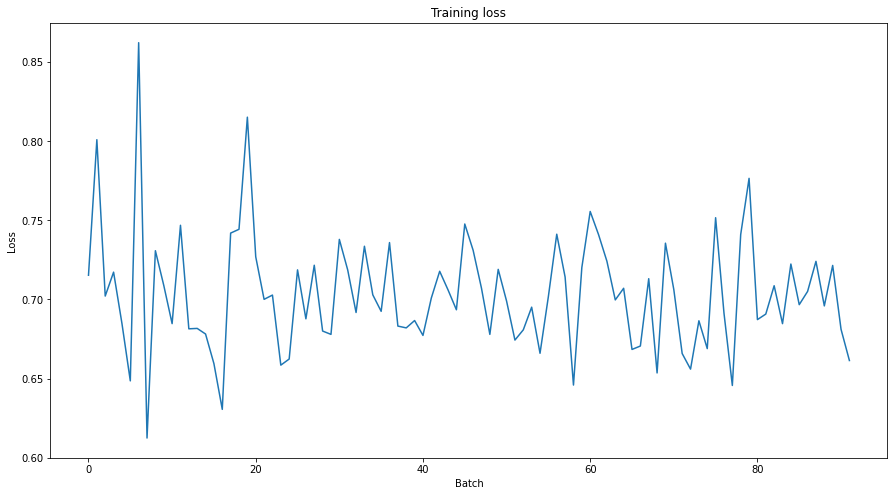

In [36]:
import matplotlib.pyplot as plt


plt.figure(figsize=(15,8))
plt.title("Training loss")
plt.xlabel("Batch")
plt.ylabel("Loss")
plt.plot(train_loss_set)
plt.show()

In [38]:
sentences = train_ds_xdata[0:2]

sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = train_ds_ydata[0:2]
tokenized_texts = [tokenize_and_trim(sent) for sent in sentences]


# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []

# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)  

prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

# Prediction on test set

# Put model in evaluation mode
model.eval()

# Tracking variables 
predictions , true_labels = [], []

# Predict 
for batch in prediction_dataloader:
  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  # Telling the model not to compute or store gradients, saving memory and speeding up prediction
  with torch.no_grad():
    # Forward pass, calculate logit predictions
    logits = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)

  # Move logits and labels to CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Store predictions and true labels
  predictions.append(logits)
  true_labels.append(label_ids)

In [39]:
predictions

[array([[ 0.09142698, -0.07012654],
        [ 0.09349121, -0.0721507 ]], dtype=float32)]